In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 4. Clustering

### 4.1 Clustering

#### Group assigmet 

With given initial value of centorids, we compute the distance between each centroid with each vector and
assign the grouping according to the smallest distance.

In [6]:
def group_assignment(data, centroids):
    grouping_vec_c = np.zeros(len(data))
    for i in range(len(data)):
        dist = np.zeros(len(centroids))
        for j in range(len(centriods)):
            dist[j] = np.linalg.norm(data[i] - centriods[j])
        min_dist = min(dist)
        for j in range(len(centriods)):
            if min_dist == dist[j]:
                grouping_vec_c[i] = j+1
    return grouping_vec_c

#### Update centriod 
update the centroid after the group assignment,
returning a new list of group centroids.

In [7]:
def update_centriod(data, grouping, centroids):
    new_centroids = [];
    for i in range(len(data)):
        cent = np.zeros(len(data[0]))
        count = 0
        for j in range(len(data)):
            if grouping[j] == (i+1):
                cent = cent+data[j]
                count += 1
        group_average = cent/count
        new_centroids.append(group_average)
    return new_centroids

#### Clustering obejctive 
Given the group assignment and the centroids with the data, we
can compute the clustering objective as the square of the RMS value of the vector of
distances.

In [8]:
def clustering_objective(data, grouping, centroids):
    J_obj = 0
    for i in range(len(data)):
        for j in range(len(centroids)):
            if grouping[i] == (j+1):
                J_obj += np.linalg.norm(data[i] - centroids[j])**2
    J_obj = J_obj/len(data)
    return J_obj

### 4.3 K-means Algorithm

In [9]:
def Kmeans_alg(data, centroids):
    iteration = 0
    J_obj_vector = []
    Stop = False
    
    while Stop == False:
        grouping = group_assignment(data, centroids)
        new_centriods = update_centriod(data, grouping, centroids)
        J_obj = clustering_objective(data, grouping, new_centriods)
        iteration += 1
        if np.linalg.norm(np.array(new_centriods) - np.array(centroids))<1e-6:
            Stop = True
        else:
            centroids = new_centriods
    
    return new_centriods, grouping, J_obj_vector, iteration

### 4.4 Example

In [15]:
X = np.concatenate([[0.3*np.random.randn(2) for i in range(100)],
[[1,1] + 0.3*np.random.randn(2) for i in range(100)],
[[1,-1] + 0.3* np.random.randn(2) for i in range(100)]])

(-2, 2)

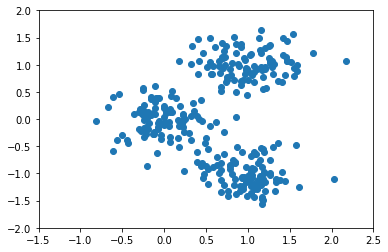

In [17]:
plt.scatter(X[:,0], X[:,1])
plt.xlim(-1.5, 2.5)
plt.ylim(-2,2)

In [18]:
from sklearn.cluster import KMeans

In [22]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
labels = kmeans.labels_
group_representatives = kmeans.cluster_centers_
J_clust = kmeans.inertia_

In [24]:
J_clust

52.00969698857904

In [38]:
grps = [[X[i] for i in range(300) if labels[i] == j] for j in range(3)]

(-2, 2)

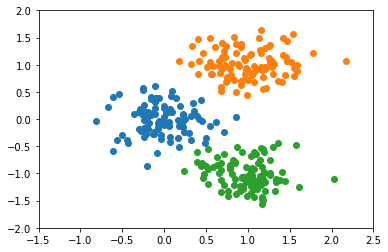

In [41]:
plt.scatter([c[0] for c in grps[0]],[c[1] for c in grps[0]])
plt.scatter([c[0] for c in grps[1]],[c[1] for c in grps[1]])
plt.scatter([c[0] for c in grps[2]],[c[1] for c in grps[2]])
plt.xlim(-1.5,2.5)
plt.ylim (-2,2)